In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from metnum import least_squares

In [2]:
df = pd.read_csv('../data/expectativa_de_vida.csv')
df.rename(columns={'Unnamed: 0' : 'Id'}, inplace=True)

df.shape

(183, 22)

In [3]:
df

,Id,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status
0,0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,...,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,Developing
1,1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,...,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,Developing
2,2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,...,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,Developing
3,3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,...,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,Developing
4,4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,...,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,188,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,...,4.998667,68.5000,0.10000,NaN,NaN,1.65000,1.56250,0.726812,12.78750,Developing
179,189,Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,...,5.977333,91.7500,0.14375,NaN,NaN,14.92500,15.62500,0.627063,11.51250,Developing
180,190,Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,...,5.005333,72.6250,0.10000,NaN,NaN,13.83125,13.75000,0.475500,8.50625,Developing
181,191,Zambia,53.90625,354.3125,33.4375,2.239333,89.650407,69.818182,6563.8125,17.45000,...,5.824000,74.2500,11.93125,811.811841,6.260246e+06,6.88125,6.76250,0.498437,11.21250,Developing


In [4]:
df.columns.tolist()

['Id',
 'Country',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Status']

In [5]:
df['Country'].tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',

In [6]:
df.dtypes

Id                                   int64
Country                             object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                      float64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                            float64
BMI                                float64
under-five deaths                  float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
Status                              object
dtype: object

In [7]:
for column in df.columns.tolist():
    if (df[column].dtype == 'float64' and column != 'Life expectancy'):
        v = df[column].values
        mask = np.abs((v - v.mean(0)) / v.std(0)) > 2
        df[column] = pd.DataFrame(np.where(mask, np.nan, v), df[column].index)

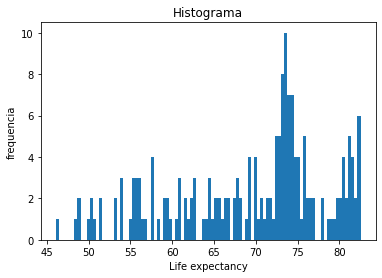

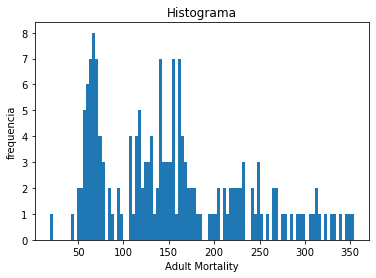

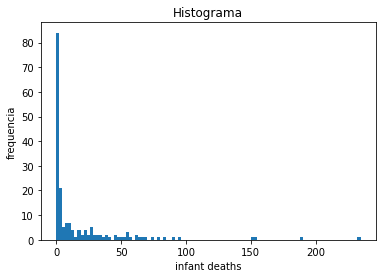

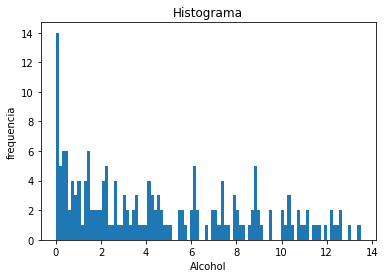

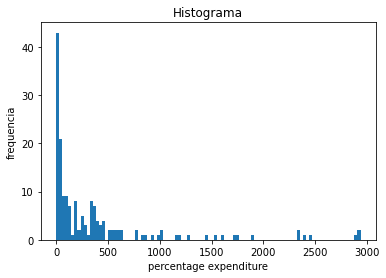

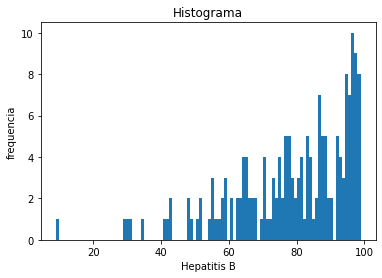

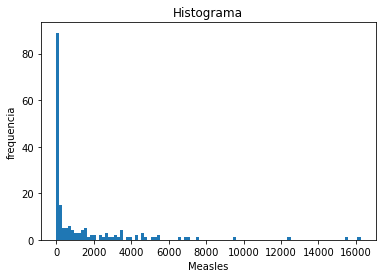

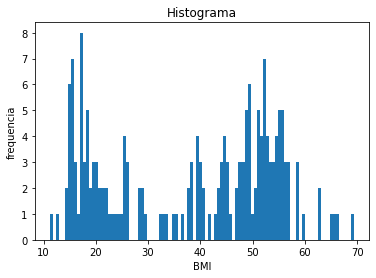

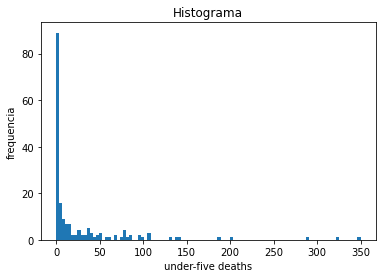

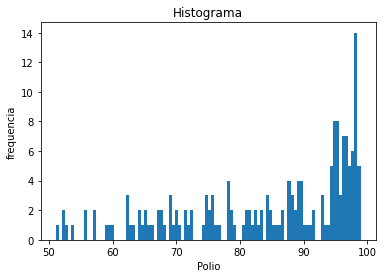

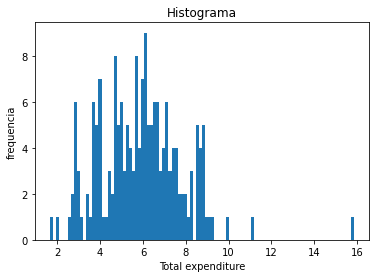

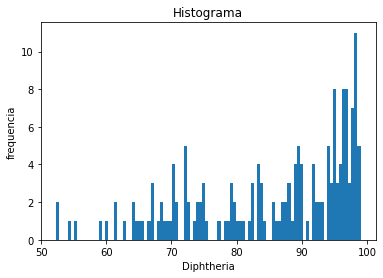

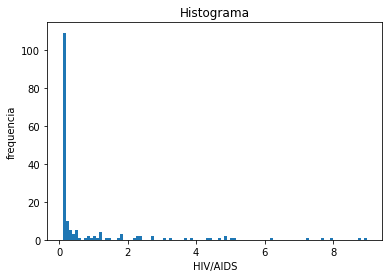

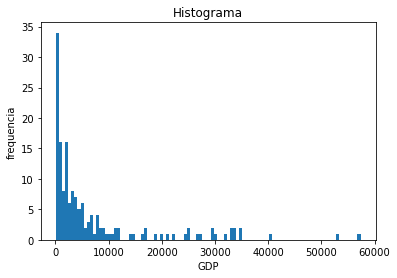

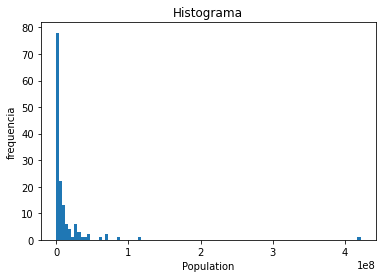

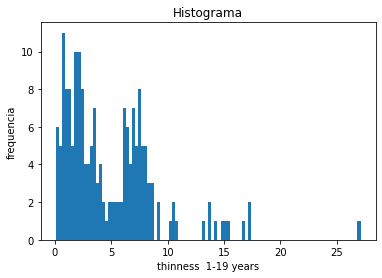

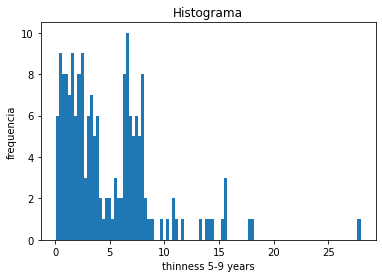

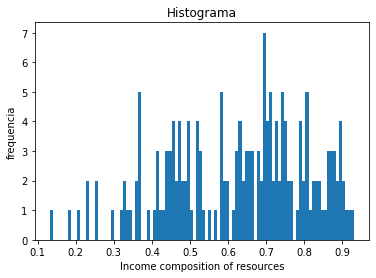

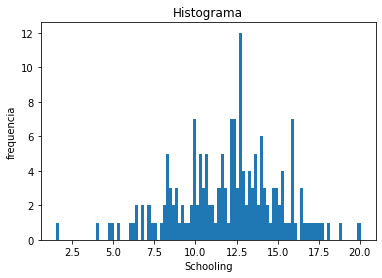

In [8]:
for column in df.columns.tolist():
    if (df[column].dtype == 'float64'):
        plt.hist(df[column][~np.isnan(df[column])], 100)
        plt.ylabel('frequencia')
        plt.xlabel(column)
        plt.title('Histograma')
        #plt.savefig('Histograma_' + column.replace('/','_') + '.pdf')
        plt.show()

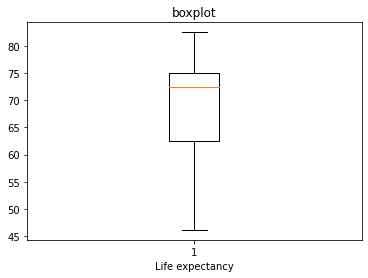

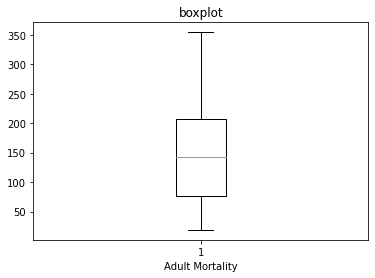

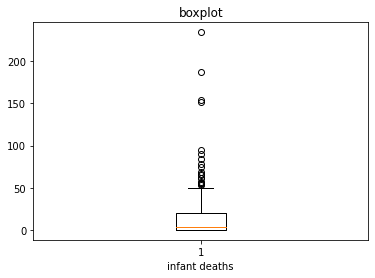

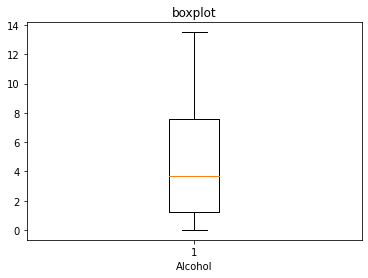

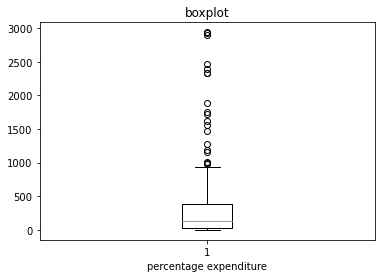

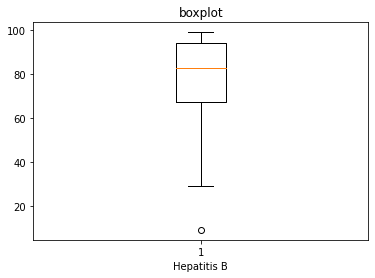

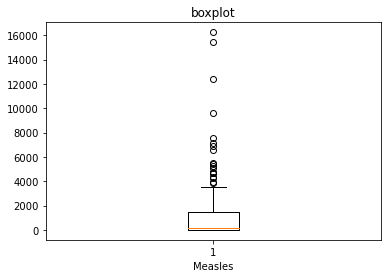

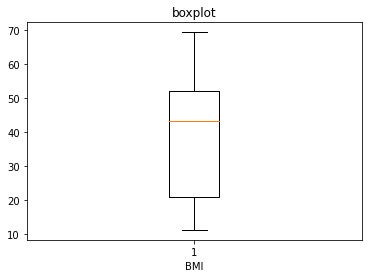

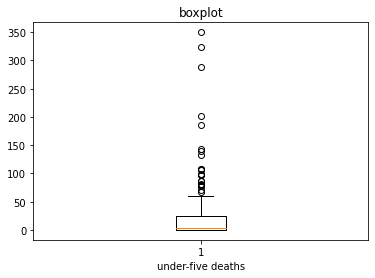

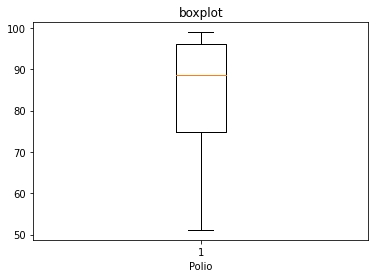

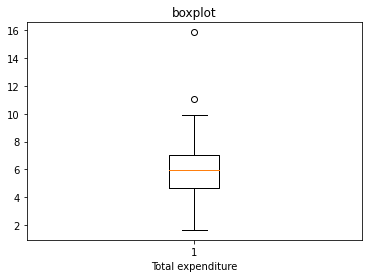

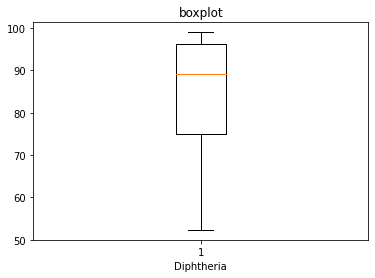

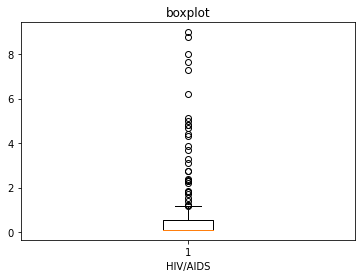

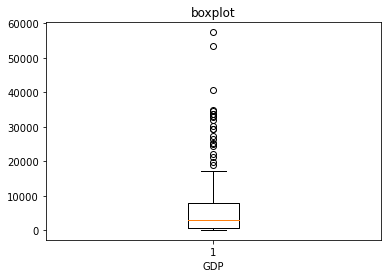

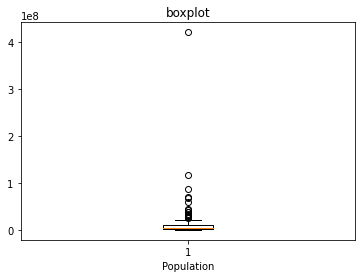

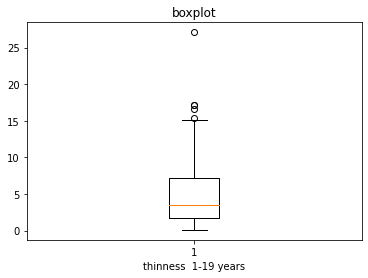

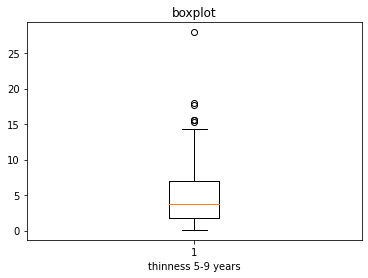

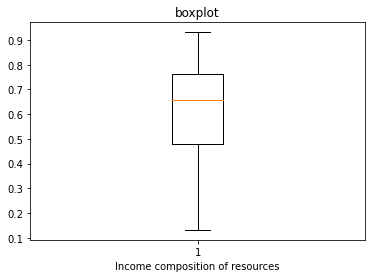

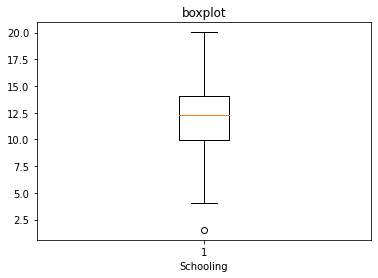

In [9]:
for column in df.columns.tolist():
    if (df[column].dtype == 'float64'):
        plt.boxplot(df[column][~np.isnan(df[column])])
        plt.xlabel(column)
        plt.title('boxplot')
        #plt.savefig('boxplot_' + column.replace('/','_') + '.pdf')
        plt.show()

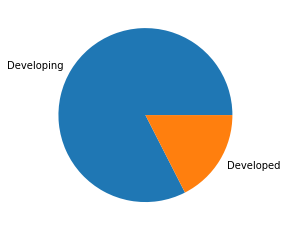

In [10]:
values = [np.count_nonzero(df['Status'] == 'Developing'), np.count_nonzero(df['Status'] == 'Developed')]
labels = ['Developing', 'Developed']

plt.pie(values, labels=labels)
plt.savefig('pie_status.pdf')
plt.show()

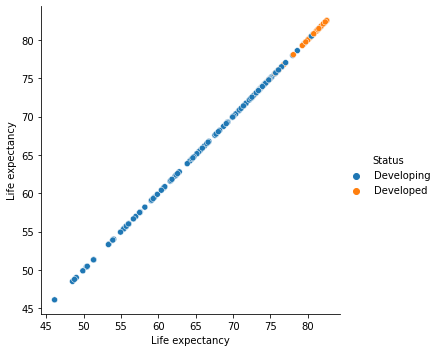

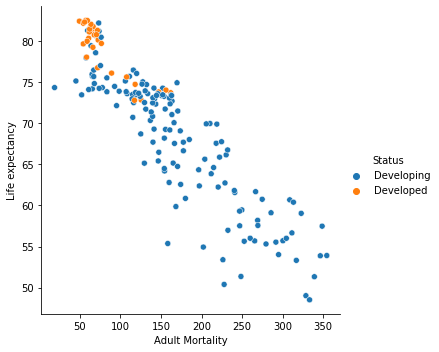

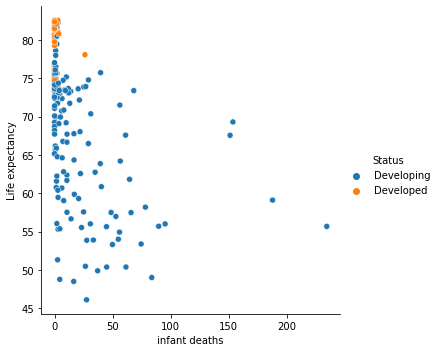

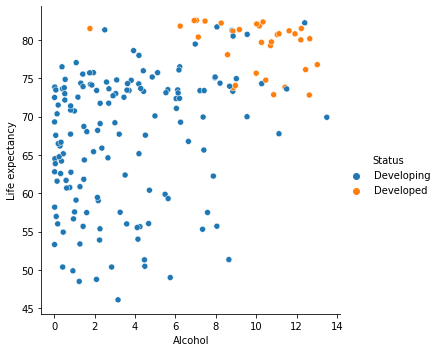

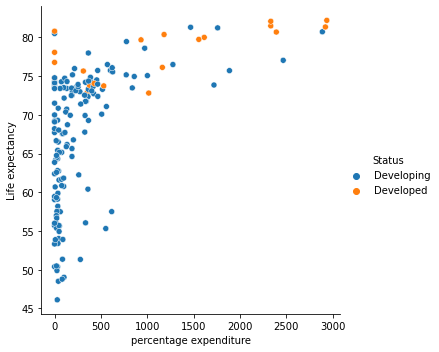

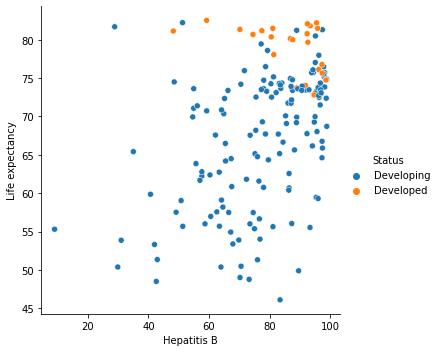

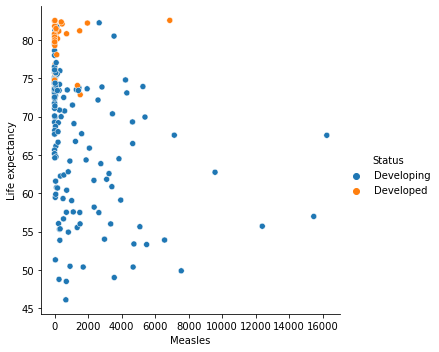

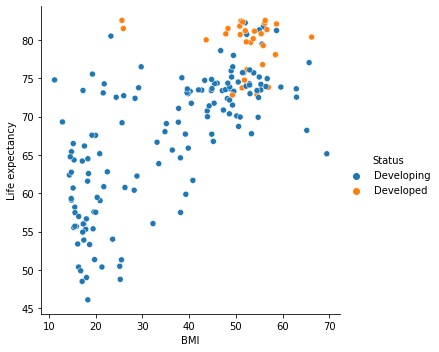

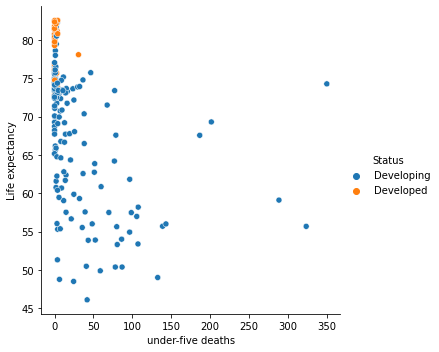

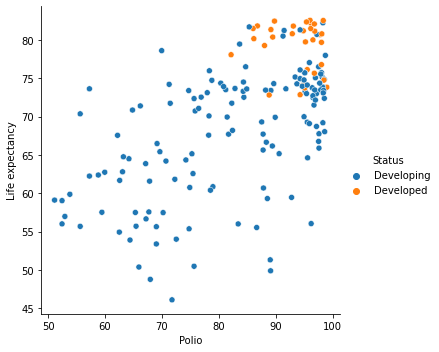

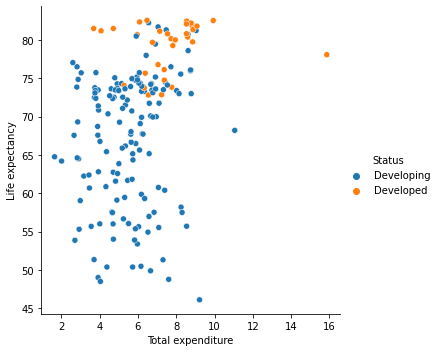

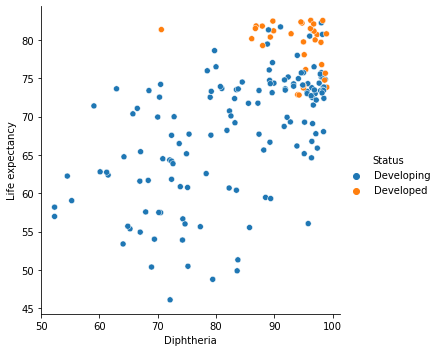

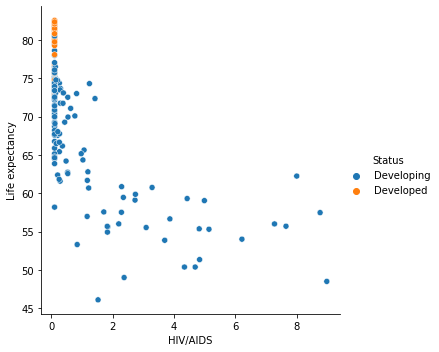

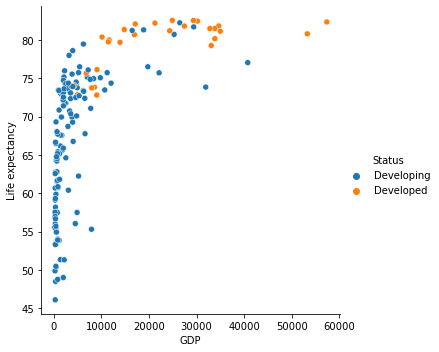

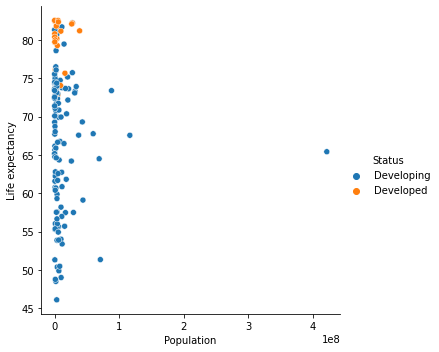

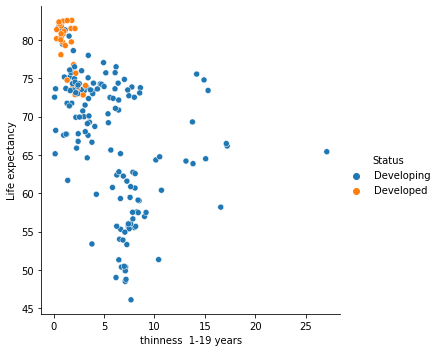

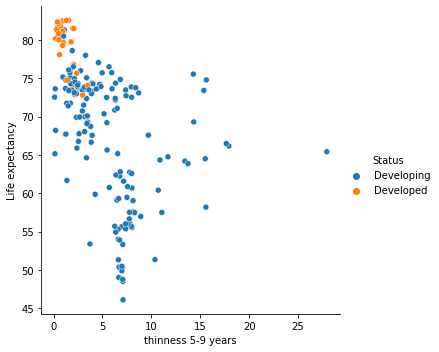

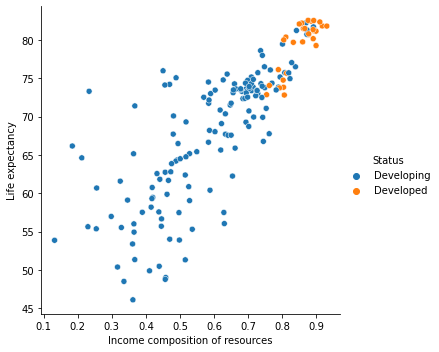

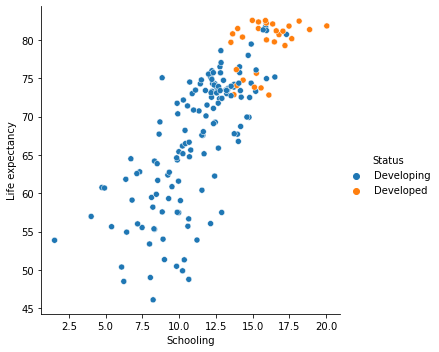

In [11]:
for column in df.columns.tolist():
    if (df[column].dtype == 'float64'):
        sns.relplot(data=df, x=column, y="Life expectancy", hue="Status")
        #plt.savefig('relplot_life_expectancy_vs_' + column.replace('/','_') + '.pdf')
        plt.show()

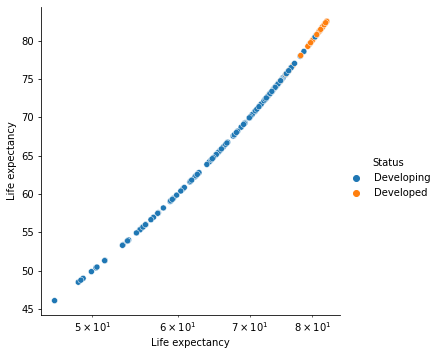

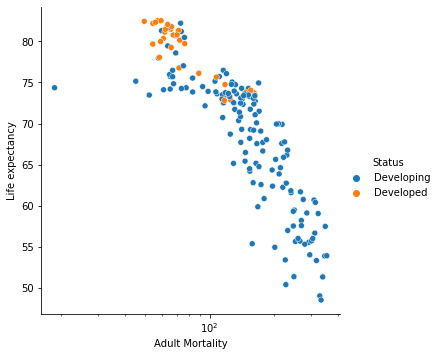

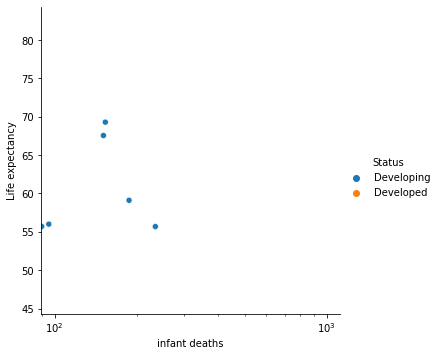

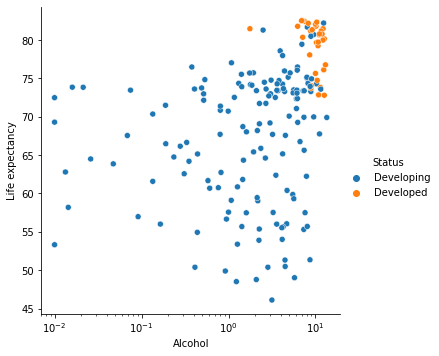

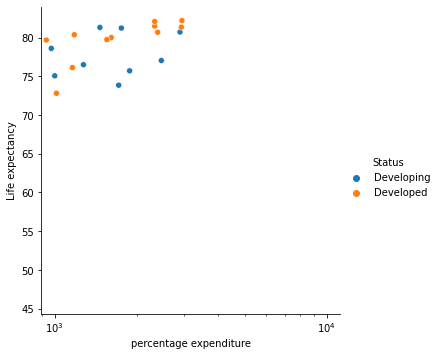

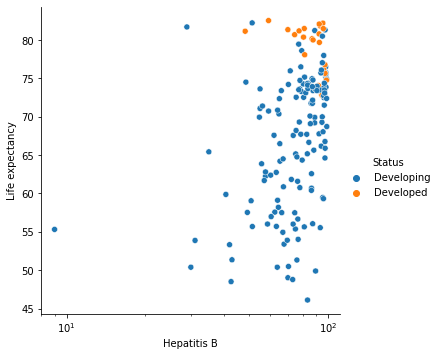

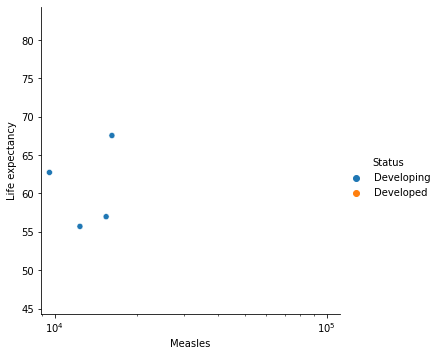

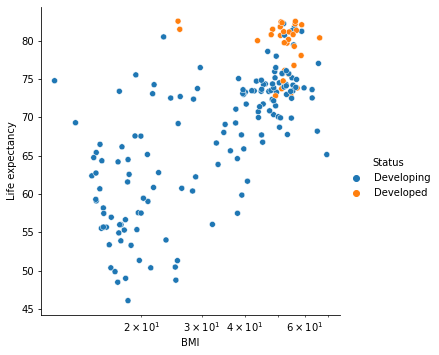

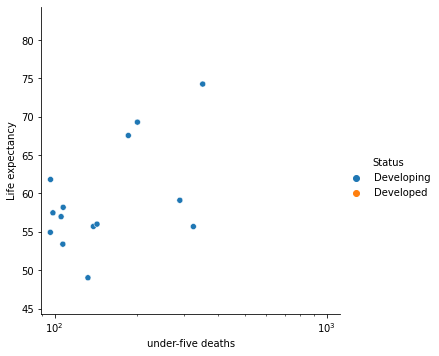

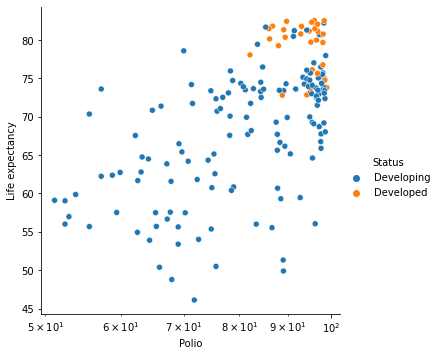

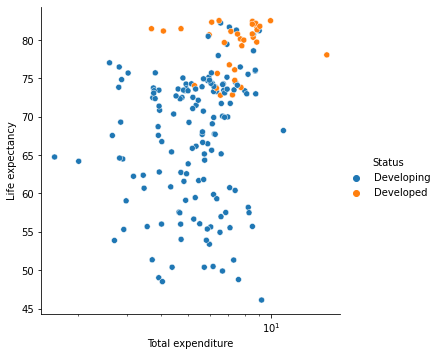

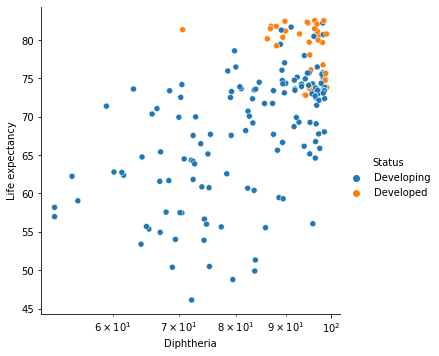

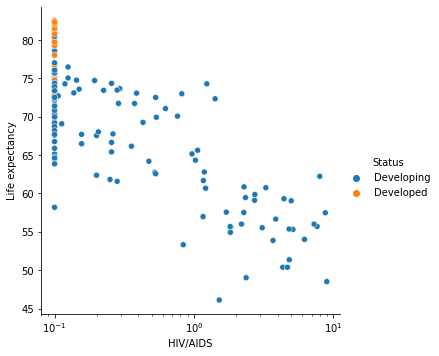

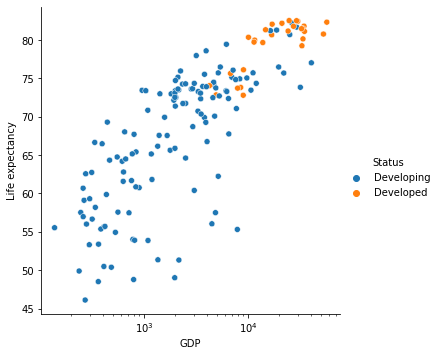

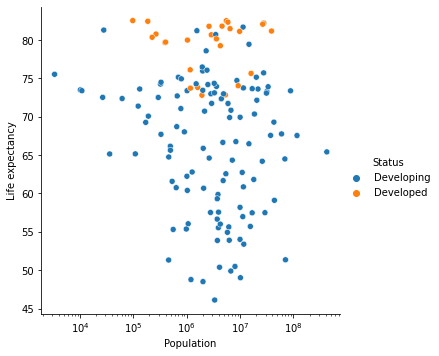

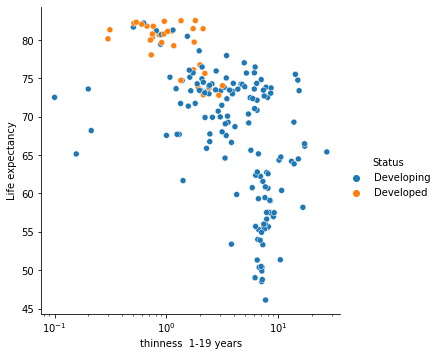

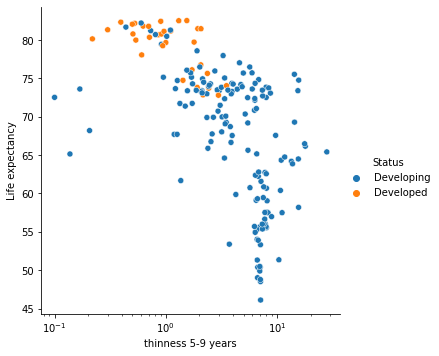

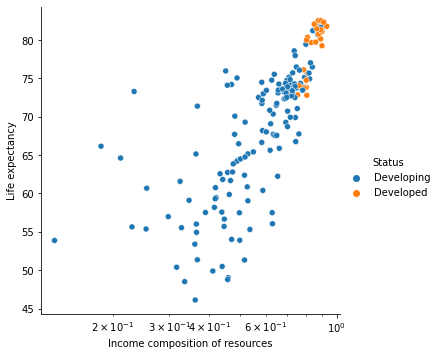

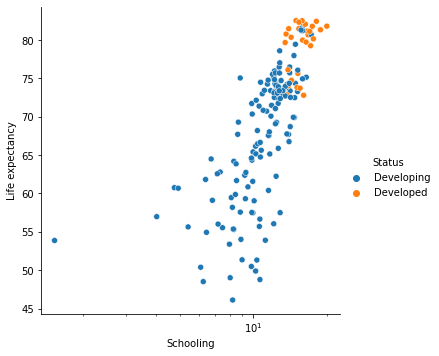

In [12]:
for column in df.columns.tolist():
    if (df[column].dtype == 'float64'):
        a = sns.relplot(data=df, x=column, y="Life expectancy", hue='Status')
        a.set(xscale="log")
        #plt.savefig('relplot_life_expectancy_vs_' + column.replace('/','_') + '_log.pdf')
        plt.show()

In [13]:
df_traffic = pd.read_csv('../data/road_traffic_death_rate.csv')
df_suicide = pd.read_csv('../data/suicide_rate.csv')

In [14]:
df_traffic

,Indicator,Location,Period,FactValueNumeric
0,Estimated road traffic death rate (per 100 000...,Antigua and Barbuda,2015,0.00
1,Estimated road traffic death rate (per 100 000...,Micronesia (Federated States of),2015,0.92
2,Estimated road traffic death rate (per 100 000...,Romania,2015,10.00
3,Estimated road traffic death rate (per 100 000...,Belarus,2015,10.07
4,Estimated road traffic death rate (per 100 000...,Bulgaria,2015,10.14
...,...,...,...,...
2923,Estimated road traffic death rate (per 100 000...,Fiji,2000,9.74
2924,Estimated road traffic death rate (per 100 000...,Uzbekistan,2000,9.74
2925,Estimated road traffic death rate (per 100 000...,Canada,2000,9.78
2926,Estimated road traffic death rate (per 100 000...,Philippines,2000,9.85


In [15]:
df_suicide

,Indicator,Location,Period,FactValueNumeric
0,Age-standardized suicide rates (per 100 000 po...,Antigua and Barbuda,2015,0.00
1,Age-standardized suicide rates (per 100 000 po...,Barbados,2015,0.16
2,Age-standardized suicide rates (per 100 000 po...,Grenada,2015,0.27
3,Age-standardized suicide rates (per 100 000 po...,Barbados,2015,0.31
4,Age-standardized suicide rates (per 100 000 po...,Antigua and Barbuda,2015,0.42
...,...,...,...,...
8779,Age-standardized suicide rates (per 100 000 po...,Guinea,2000,9.73
8780,Age-standardized suicide rates (per 100 000 po...,Ghana,2000,9.75
8781,Age-standardized suicide rates (per 100 000 po...,Malta,2000,9.75
8782,Age-standardized suicide rates (per 100 000 po...,Seychelles,2000,9.76


In [16]:
df_traffic = df_traffic.groupby(['Location']).mean()
df_suicide = df_suicide.groupby(['Location']).mean()

df.insert(len(df.columns), 'Road traffic death rate', df_traffic['FactValueNumeric'].to_list())
df.insert(len(df.columns), 'Suicide rate', df_suicide['FactValueNumeric'].to_list())

In [17]:
df

,Id,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status,Road traffic death rate,Suicide rate
0,0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,...,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,Developing,14.645625,7.049375
1,1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,...,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,Developing,14.352500,6.140208
2,2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,...,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,Developing,22.130000,3.521250
3,3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,...,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,Developing,24.918750,15.771875
4,4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,...,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,Developing,5.093750,0.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,188,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,...,0.10000,NaN,NaN,1.65000,1.56250,0.726812,12.78750,Developing,32.036875,4.313750
179,189,Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,...,0.14375,NaN,NaN,14.92500,15.62500,0.627063,11.51250,Developing,24.743750,7.350208
180,190,Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,...,0.10000,NaN,NaN,13.83125,13.75000,0.475500,8.50625,Developing,22.860000,7.715833
181,191,Zambia,53.90625,354.3125,33.4375,2.239333,89.650407,69.818182,6563.8125,17.45000,...,NaN,811.811841,6.260246e+06,6.88125,6.76250,0.498437,11.21250,Developing,23.893750,21.276250


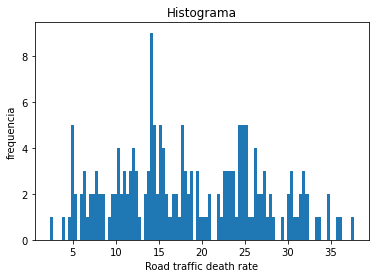

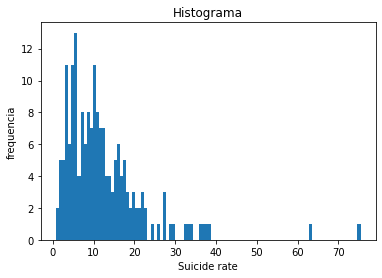

In [18]:
plt.hist(df['Road traffic death rate'], 100)
plt.ylabel('frequencia')
plt.xlabel('Road traffic death rate')
plt.title('Histograma')
plt.savefig('Histograma_Road_traffic_death_rate.pdf')
plt.show()

plt.hist(df['Suicide rate'], 100)
plt.ylabel('frequencia')
plt.xlabel('Suicide rate')
plt.title('Histograma')
plt.savefig('Histograma_Suicide_rate.pdf')
plt.show()

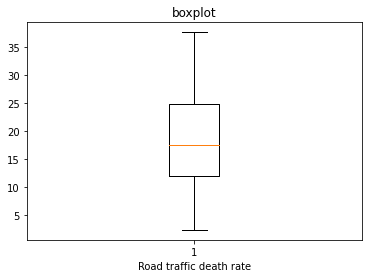

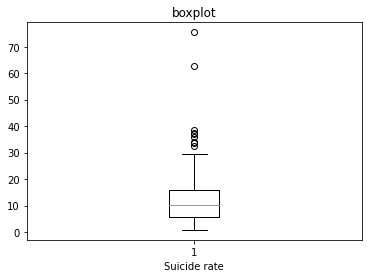

In [19]:
plt.boxplot(df['Road traffic death rate'])
plt.xlabel('Road traffic death rate')
plt.title('boxplot')
plt.savefig('boxplot_Road_traffic_death_rate.pdf')
plt.show()

plt.boxplot(df['Suicide rate'])
plt.xlabel('Suicide rate')
plt.title('boxplot')
plt.savefig('boxplot_Suicide_rate.pdf')
plt.show()

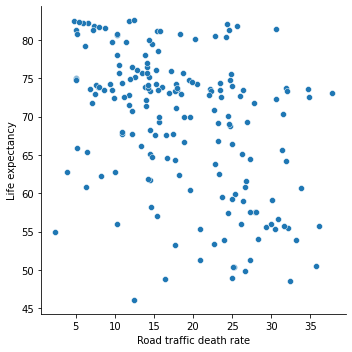

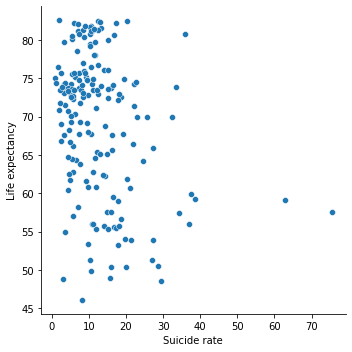

In [20]:
sns.relplot(data=df, x='Road traffic death rate', y="Life expectancy")
plt.savefig('relplot_life_expectancy_vs_Road_traffic_death_rate.pdf')
plt.show()

sns.relplot(data=df, x='Suicide rate', y="Life expectancy")
plt.savefig('relplot_life_expectancy_vs_Suicide_rate.pdf')
plt.show()

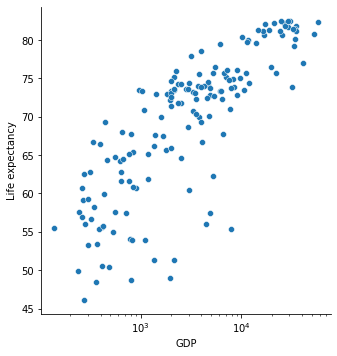

In [21]:
a = sns.relplot(data=df, x='GDP', y="Life expectancy")
a.set(xscale="log")
plt.savefig('relplot_life_expectancy_vs_GDP_log.pdf')
plt.show()

In [22]:
nombre = []
cant_paises = []
corr = []
corr_log = []
var = []
var_log = []

for column in df.columns.tolist():
    if (df[column].dtype == 'float64'):
        mask = ~np.isnan(df[column])
        logcol = pd.DataFrame(np.log(df[column]))
        
        #Columna
        nombre.append(column)
        #Cantidad de paises con datos
        cant_paises.append(len(df[column][mask]))
        #correlacion con esperanza de vida
        corr.append(df.corr()[column]['Life expectancy'])
        #correlacion con esperanza de vida en log
        corr_log.append(logcol.corrwith(df['Life expectancy'])[0])
        #varianza
        var.append(np.var(df[column][mask]))
        #varianza en log
        var_log.append(np.var(np.log(df[column][mask])))

d = {'nombre':nombre, 'paises con datos': cant_paises, 'correlacion': corr, 'correlacion log': corr_log, 'varianza': var, 'varianza log': var_log}
tablita = pd.DataFrame(data=d)
print(tablita.to_latex(index=False))
tablita

\begin{tabular}{lrrrrr}
\toprule
                         nombre &  paises con datos &  correlacion &  correlacion log &     varianza &  varianza log \\
\midrule
                Life expectancy &               183 &     1.000000 &         0.997403 & 8.392938e+01 &      0.019592 \\
                Adult Mortality &               176 &    -0.903170 &        -0.862559 & 6.339127e+03 &      0.307155 \\
                  infant deaths &               179 &    -0.451092 &              NaN & 1.064983e+03 &           NaN \\
                        Alcohol &               182 &     0.461720 &         0.323084 & 1.472894e+01 &      2.702091 \\
         percentage expenditure &               169 &     0.527402 &              NaN & 3.605687e+05 &           NaN \\
                    Hepatitis B &               174 &     0.429536 &         0.387931 & 3.021133e+02 &      0.088031 \\
                        Measles &               179 &    -0.327209 &              NaN & 6.188479e+06 &           NaN \

/home/iglosiggio/facu/metodos/labos/tp3/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,nombre,paises con datos,correlacion,correlacion log,varianza,varianza log
0,Life expectancy,183,1.000000,0.997403,8.392938e+01,0.019592
1,Adult Mortality,176,-0.903170,-0.862559,6.339127e+03,0.307155
2,infant deaths,179,-0.451092,NaN,1.064983e+03,NaN
3,Alcohol,182,0.461720,0.323084,1.472894e+01,2.702091
4,percentage expenditure,169,0.527402,NaN,3.605687e+05,NaN
5,Hepatitis B,174,0.429536,0.387931,3.021133e+02,0.088031
6,Measles,179,-0.327209,NaN,6.188479e+06,NaN
7,BMI,181,0.723824,0.720509,2.517515e+02,0.240734
8,under-five deaths,180,-0.415363,NaN,2.751550e+03,NaN
9,Polio,175,0.607226,0.602185,1.789515e+02,0.029897


In [23]:
poblacion_vacunada = []
gasto_bruto_salud = []

for index, row in df.iterrows():
    if (np.isnan(row['Hepatitis B']) or np.isnan(row['Polio']) or np.isnan(row['Diphtheria'])):
        poblacion_vacunada.append(np.nan)
    else:
        poblacion_vacunada.append((1-row['Hepatitis B']/100)*(1-row['Polio']/100)*(1-row['Diphtheria']/100))
        
    if (np.isnan(row['GDP']) or np.isnan(row['percentage expenditure']) or row['percentage expenditure'] == 0):
        gasto_bruto_salud.append(np.nan)
    else:
        gasto_bruto_salud.append(np.log((row['percentage expenditure']/100)*row['GDP']))

In [24]:
df.insert(len(df.columns), 'Poblacion no vacunada', poblacion_vacunada)
df.insert(len(df.columns), 'Gasto bruto salud', gasto_bruto_salud)
df

,Id,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status,Road traffic death rate,Suicide rate,Poblacion no vacunada,Gasto bruto salud
0,0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,...,9.972260e+06,16.58125,15.58125,0.415375,8.21250,Developing,14.645625,7.049375,NaN,4.778028
1,1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,...,6.969116e+05,1.61875,1.70000,0.709875,12.13750,Developing,14.352500,6.140208,0.000007,8.317904
2,2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,...,2.164983e+07,6.09375,5.97500,0.694875,12.71250,Developing,22.130000,3.521250,0.001475,8.813767
3,3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,...,1.014710e+07,6.19375,6.66875,0.458375,8.04375,Developing,24.918750,15.771875,NaN,7.609181
4,4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,...,NaN,3.42500,3.37500,0.488625,8.84375,Developing,5.093750,0.796667,0.000009,11.490146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,188,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,...,NaN,1.65000,1.56250,0.726812,12.78750,Developing,32.036875,4.313750,0.026910,NaN
179,189,Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,...,NaN,14.92500,15.62500,0.627063,11.51250,Developing,24.743750,7.350208,0.000520,NaN
180,190,Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,...,NaN,13.83125,13.75000,0.475500,8.50625,Developing,22.860000,7.715833,0.039879,NaN
181,191,Zambia,53.90625,354.3125,33.4375,2.239333,89.650407,69.818182,6563.8125,17.45000,...,6.260246e+06,6.88125,6.76250,0.498437,11.21250,Developing,23.893750,21.276250,0.027687,6.590016


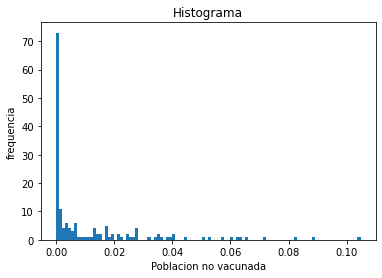

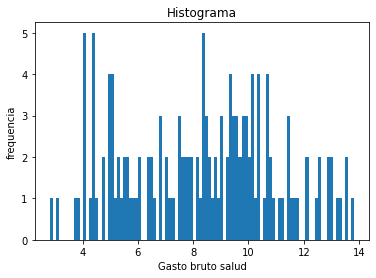

In [25]:
plt.hist(df['Poblacion no vacunada'], 100)
plt.ylabel('frequencia')
plt.xlabel('Poblacion no vacunada')
plt.title('Histograma')
plt.savefig('Histograma_Poblacion_no_vacunada.pdf')
plt.show()

plt.hist(df['Gasto bruto salud'], 100)
plt.ylabel('frequencia')
plt.xlabel('Gasto bruto salud')
plt.title('Histograma')
plt.savefig('Histograma_Gasto_bruto_salud.pdf')
plt.show()

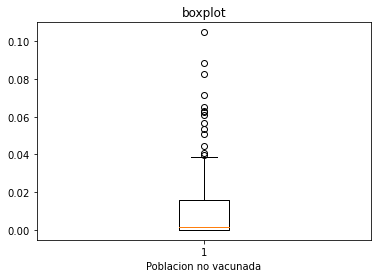

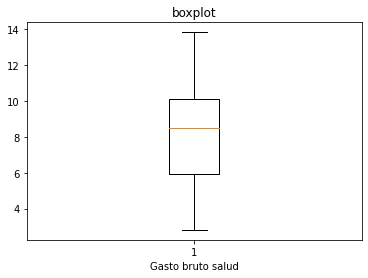

In [26]:
plt.boxplot(df['Poblacion no vacunada'][~np.isnan(df['Poblacion no vacunada'])])
plt.xlabel('Poblacion no vacunada')
plt.title('boxplot')
plt.savefig('boxplot_Poblacion_no_acunada.pdf')
plt.show()

plt.boxplot(df['Gasto bruto salud'][~np.isnan(df['Gasto bruto salud'])])
plt.xlabel('Gasto bruto salud')
plt.title('boxplot')
plt.savefig('boxplot_Gasto_bruto_salud.pdf')
plt.show()

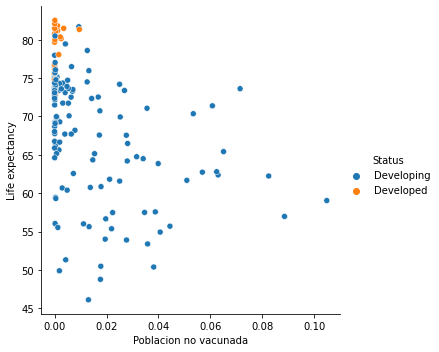

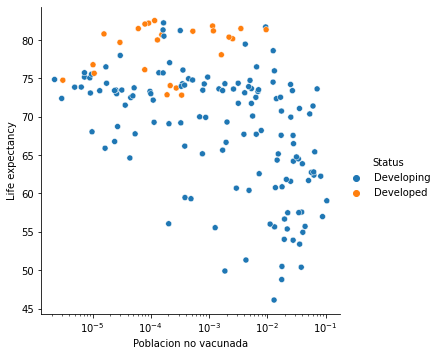

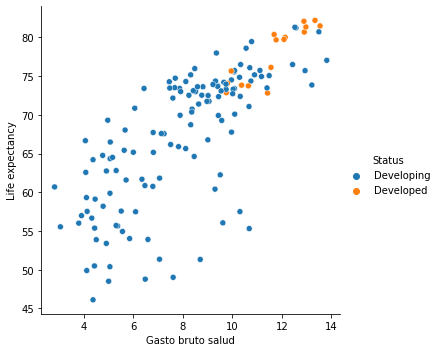

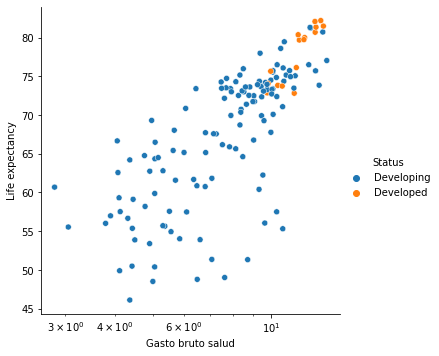

In [27]:
sns.relplot(data=df, x='Poblacion no vacunada', y="Life expectancy", hue="Status")
plt.savefig('relplot_life_expectancy_vs_Poblacion_vacunada.pdf')
plt.show()

a = sns.relplot(data=df, x='Poblacion no vacunada', y="Life expectancy", hue="Status")
a.set(xscale="log")
plt.savefig('relplot_life_expectancy_vs_Poblacion_vacunada_log.pdf')
plt.show()

sns.relplot(data=df, x='Gasto bruto salud', y="Life expectancy", hue="Status")
plt.savefig('relplot_life_expectancy_vs_Gasto_bruto_salud.pdf')
plt.show()

a = sns.relplot(data=df, x='Gasto bruto salud', y="Life expectancy", hue="Status")
a.set(xscale="log")
plt.savefig('relplot_life_expectancy_vs_Gasto_bruto_salud_log.pdf')
plt.show()

In [28]:
df_poblacion = pd.DataFrame(np.log(df['Poblacion no vacunada']))

print('Poblacion no vacunada')
print('paises con datos:', len(df['Poblacion no vacunada'][~np.isnan(df['Poblacion no vacunada'])]))
#correlacion con esperanza de vida
print('correlacion:', df.corr()['Poblacion no vacunada']['Life expectancy'])
#correlacion con esperanza de vida en log
print('correlacion log:', df_poblacion.corrwith(df['Life expectancy'])[0])
#varianza
print('varianza:', np.var(df['Poblacion no vacunada'][mask]))
#varianza en log
print('varianza log:', np.var(np.log(df['Poblacion no vacunada'][mask])))

df_gasto = pd.DataFrame(np.log(df['Gasto bruto salud']))

print('Gasto bruto salud')
print('paises con datos:', len(df['Gasto bruto salud'][~np.isnan(df['Gasto bruto salud'])]))
#correlacion con esperanza de vida
print('correlacion:', df.corr()['Gasto bruto salud']['Life expectancy'])
#correlacion con esperanza de vida en log
print('correlacion log:', df_gasto.corrwith(df['Life expectancy'])[0])
#varianza
print('varianza:', np.var(df['Gasto bruto salud'][mask]))
#varianza en log
print('varianza log:', np.var(np.log(df['Gasto bruto salud'][mask])))

Poblacion no vacunada
paises con datos: 160
correlacion: -0.45026873380019666
correlacion log: -0.49426653114772023
varianza: 0.00037548628922441033
varianza log: 8.305052614525135
Gasto bruto salud
paises con datos: 143
correlacion: 0.7631471017119658
correlacion log: 0.7534210252410342
varianza: 7.251681893885829
varianza log: 0.12896944020393572


# Cuadrados Mínimos

Bueno, ahora vamos a arrancar a armar nuestro modelo de a poco.

In [29]:
def normalizar(M):
    return (M - np.mean(M)) / np.std(M)

def TSS(B):
    return np.sum((B - np.mean(B))**2)

def RSS(A, X, B):
    return np.sum((B - A @ X)**2)

def R2(RSS, TSS):
    return (TSS - RSS) / TSS

def R2_ajustado(R2, N, p):
    return 1 - (1 - R2)*(N - 1)/(N - p - 1)

def residual_plot(A, X, B):
    predicted = A @ X
    residual = B - predicted
    plt.plot(predicted, residual, 'x', markersize=14)
    plt.xlabel("Predicciones")
    plt.ylabel("Residuos")
    plt.hlines(0, xmin=min(predicted), xmax=max(predicted), )
    plt.title("Residual plot")
    plt.show()
    return plt

def probar_modelo(A):
    mask = ~A.isna().T.any()
    # Cargamos sólo las cosas dónde tenemos todos los datos
    A = A[mask]
    B = B_orig[mask]
    # Normalizamos A
    A = normalizar(A)
    N = len(A)
    p = len(A.columns)
    X = least_squares(A, B)
    tss = TSS(B)
    rss = RSS(A, X, B)
    r2 = R2(rss, tss)
    r2_ajustado = R2_ajustado(r2, N, p)
    print()
    print(f'Features = {list(A.columns)}')
    print(f'Dado que filtramos NaNs estamos considerando solamente {N} países')
    print(f'X = {list(zip(A.columns, X))}')
    print(f'TSS = {tss}')
    print(f'RSS = {rss}')
    print(f'R^2 = {r2}')
    print(f'R^2 ajustado = {r2_ajustado}')
    plt = residual_plot(A, X, B)
    print()
    return plt

B_orig = df['Life expectancy']
B_orig = normalizar(B_orig)

print(f'TSS = {TSS(B_orig)}')

TSS = 182.99999999999994


Para el modelo inicial tomamos las dos variables que mejor correlacionan

Features = ['Income composition of resources', 'Adult Mortality']
Dado que filtramos NaNs estamos considerando solamente 167 países
X = [('Income composition of resources', 0.36050617392793166), ('Adult Mortality', -0.570873900266142)]
TSS = 141.91395077980002
RSS = 18.07649762544226
R^2 = 0.8726235333022998
R^2 ajustado = 0.8710701617572059


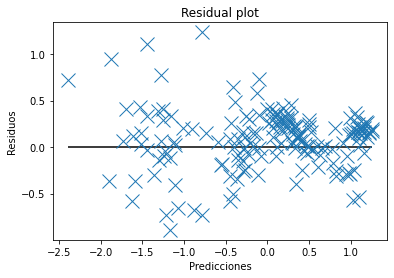


Probamos agregando HIV/AIDS dado que tiene buena correlación con la expectativa de vida y creemos que no está muy correlacionada con las otras que ya usamos

Features = ['Income composition of resources', 'Adult Mortality', 'HIV/AIDS']
Dado que filtramos NaNs estamos considerando solamente 163 países
X = [('Income composition of resources', 0.362595560435268), ('Adult Mortality', -0.4324657070990073), ('HIV/AIDS', -0.15717912576674553)]
TSS = 130.02905722203298
RSS = 16.33791464971374
R^2 = 0.8743518179800712
R^2 ajustado = 0.8719810975646008


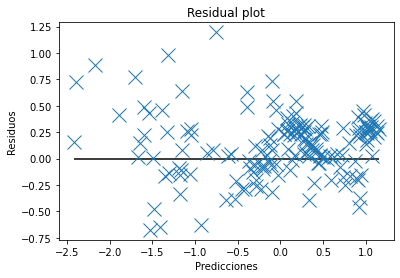


Bueno.. agregó un 0.0009 en el R^2 ajustado :(


In [30]:
print('Para el modelo inicial tomamos las dos variables que mejor correlacionan')
probar_modelo(df[['Income composition of resources', 'Adult Mortality']])

print('Probamos agregando HIV/AIDS dado que tiene buena correlación con la expectativa de vida y creemos que no está muy correlacionada con las otras que ya usamos')
probar_modelo(df[['Income composition of resources', 'Adult Mortality', 'HIV/AIDS']])
print('Bueno.. agregó un 0.0009 en el R^2 ajustado :(')

A ver, miremos la **matriz de correlaciones** para facilitar nuestras decisiones

In [31]:
df.corr()

,Id,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Road traffic death rate,Suicide rate,Poblacion no vacunada,Gasto bruto salud
Id,1.000000,-0.017423,0.034826,-0.060141,-0.067136,-0.013696,-0.012255,0.112956,0.021571,-0.086865,...,-0.029959,-0.025909,0.009538,0.025389,-0.028474,-0.026308,0.031375,0.014224,0.103999,-0.043446
Life expectancy,-0.017423,1.000000,-0.903170,-0.451092,0.461720,0.527402,0.429536,-0.327209,0.723824,-0.415363,...,0.611808,-0.039915,-0.523989,-0.515970,0.817545,0.794457,-0.429526,-0.320527,-0.450269,0.763147
Adult Mortality,0.034826,-0.903170,1.000000,0.420718,-0.318861,-0.482814,-0.377846,0.316412,-0.667053,0.364025,...,-0.552551,0.008883,0.423175,0.423904,-0.711088,-0.694508,0.425826,0.348846,0.392519,-0.658589
infant deaths,-0.060141,-0.451092,0.420718,1.000000,-0.299103,-0.258483,-0.276369,0.623267,-0.471327,0.993221,...,-0.292961,0.624842,0.356854,0.358224,-0.371992,-0.439074,0.255718,0.202982,0.270566,-0.443552
Alcohol,-0.067136,0.461720,-0.318861,-0.299103,1.000000,0.334253,0.152185,-0.234687,0.450205,-0.270040,...,0.492621,-0.055793,-0.503288,-0.488593,0.556444,0.623472,-0.192117,-0.006185,-0.299530,0.529301
percentage expenditure,-0.013696,0.527402,-0.482814,-0.258483,0.334253,1.000000,0.258299,-0.225729,0.433515,-0.250004,...,0.888208,-0.065458,-0.331077,-0.333511,0.588023,0.575843,-0.229410,-0.102489,-0.249439,0.785404
Hepatitis B,-0.012255,0.429536,-0.377846,-0.276369,0.152185,0.258299,1.000000,-0.241511,0.300396,-0.261734,...,0.143379,-0.211573,-0.224350,-0.232575,0.337503,0.395088,-0.125229,-0.244821,-0.716450,0.418529
Measles,0.112956,-0.327209,0.316412,0.623267,-0.234687,-0.225729,-0.241511,1.000000,-0.443944,0.633272,...,-0.208747,0.471158,0.279693,0.306975,-0.254227,-0.309991,0.120002,0.041737,0.385866,-0.381182
BMI,0.021571,0.723824,-0.667053,-0.471327,0.450205,0.433515,0.300396,-0.443944,1.000000,-0.476425,...,0.466903,-0.149859,-0.714633,-0.717365,0.681697,0.721263,-0.378981,-0.212528,-0.357067,0.729402
under-five deaths,-0.086865,-0.415363,0.364025,0.993221,-0.270040,-0.250004,-0.261734,0.633272,-0.476425,1.000000,...,-0.271384,0.441408,0.325527,0.316038,-0.340351,-0.411584,0.245065,0.197611,0.224840,-0.410494


Hagamos una prueba más, tomemos log(HIV/AIDS) para ver si mirándolo en esa escala ganamos un poco más

Features = ['Income composition of resources', 'Adult Mortality', 'HIV/AIDS']
Dado que filtramos NaNs estamos considerando solamente 163 países
X = [('Income composition of resources', 0.32742999060349354), ('Adult Mortality', -0.40835819934080453), ('HIV/AIDS', -0.20188093350523015)]
TSS = 130.02905722203298
RSS = 15.867778873852894
R^2 = 0.877967438872085
R^2 ajustado = 0.8756649377187281


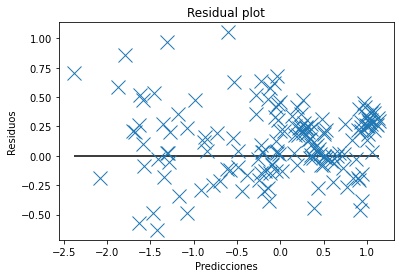


Explica un poco más, pero la diferencia sigue siendo ínfima

Y si usamos todas las columnas?

Features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Road traffic death rate', 'Suicide rate', 'Poblacion no vacunada', 'Gasto bruto salud']
Dado que filtramos NaNs estamos considerando solamente 100 países
X = [('Adult Mortality', -0.2466324812002401), ('infant deaths', 0.7408028838654643), ('Alcohol', -0.04148425592911747), ('percentage expenditure', 0.0977117244933423), ('Hepatitis B', -0.029922726299744476), ('Measles', 0.045670958914056384), ('BMI', 0.022708006917166776), ('under-five deaths', -0.7582482488783421), ('Polio', -0.04282547783223393), ('Total expenditure', 0.04826809285730911), ('Diphtheria', 0.11132445202428656), ('HIV/A

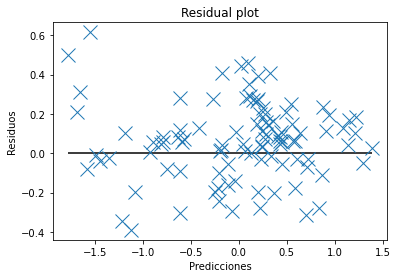


Al parecer nuestro tupo es de 0.92 en R^2


In [32]:
print('Hagamos una prueba más, tomemos log(HIV/AIDS) para ver si mirándolo en esa escala ganamos un poco más')
df2 = df[['Income composition of resources', 'Adult Mortality']].copy()
df2['HIV/AIDS'] = np.log(df[['HIV/AIDS']])
probar_modelo(df2)
print('Explica un poco más, pero la diferencia sigue siendo ínfima\n')

print('Y si usamos todas las columnas?')
probar_modelo(df[[column for column in df if column not in ['Life expectancy', 'Status', 'Country', 'Id']]])
print('Al parecer nuestro tupo es de 0.92 en R^2')

Tenemos un tope de $0.92$ para $R^2$ (usando todas las columnas) y un modelo razonable con $0.87$ usando solo dos columnas.

Mirando los coeficientes del modelo de regresión usando todas las columnas nos sentimos tentados de agregar `under-five deaths` a ver si mejora nuestro $R^2$.


Features = ['Income composition of resources', 'Adult Mortality', 'under-five deaths']
Dado que filtramos NaNs estamos considerando solamente 164 países
X = [('Income composition of resources', 0.33657810416978884), ('Adult Mortality', -0.5649814698459367), ('under-five deaths', -0.059824933312303374)]
TSS = 137.10769796077022
RSS = 17.174511553475032
R^2 = 0.8747370730534104
R^2 ajustado = 0.8723883931731619


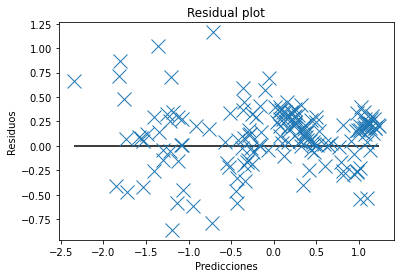


Ok, es similar al modelo usando la información de HIV. ¿Qué pasa si quitamos `Income composition of resources`?

Features = ['Adult Mortality', 'under-five deaths']
Dado que filtramos NaNs estamos considerando solamente 173 países
X = [('Adult Mortality', -0.8039114304426233), ('under-five deaths', -0.10448023670501405)]
TSS = 149.2567622988684
RSS = 26.57005395971123
R^2 = 0.8219842535073356
R^2 ajustado = 0.819889950607422


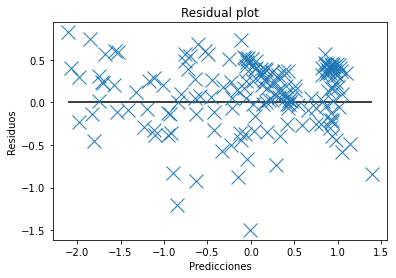

<module 'matplotlib.pyplot' from '/home/iglosiggio/facu/metodos/labos/tp3/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [33]:
probar_modelo(df[['Income composition of resources', 'Adult Mortality', 'under-five deaths']])
print('Ok, es similar al modelo usando la información de HIV. ¿Qué pasa si quitamos `Income composition of resources`?')
probar_modelo(df[['Adult Mortality', 'under-five deaths']])

Bueno `under-five-deaths` parece no haber colaborado tanto (Tal vez sólo importante cómo contra balance de otra columna?). Tenemos `Gasto bruto salud` cómo otro dato relacionado con la salud, probemos con ese.


Features = ['Income composition of resources', 'Adult Mortality', 'Gasto bruto salud']
Dado que filtramos NaNs estamos considerando solamente 137 países
X = [('Income composition of resources', 0.2155935059521663), ('Adult Mortality', -0.5335558931918202), ('Gasto bruto salud', 0.1837386169009058)]
TSS = 111.89738043688934
RSS = 14.456928549377967
R^2 = 0.8708019035572353
R^2 ajustado = 0.8678876607803309


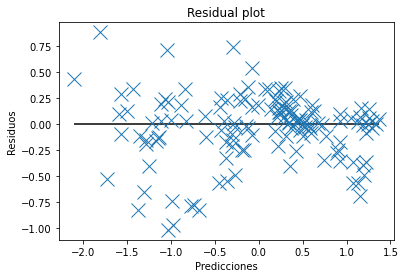


Bajó, probablemente porque ahora estamos mirando 30 países menos!


In [34]:
probar_modelo(df[['Income composition of resources', 'Adult Mortality', 'Gasto bruto salud']])
print('Bajó, probablemente porque ahora estamos mirando 30 países menos!')

Otra opción es mirar $\log(\text{GDP})$ para ver si el dinero en general es más representativo que sólo mirar el dinero gastado en salud.


Features = ['Income composition of resources', 'Adult Mortality', 'GDP']
Dado que filtramos NaNs estamos considerando solamente 151 países
X = [('Income composition of resources', 0.24680704419982957), ('Adult Mortality', -0.549517025574073), ('GDP', 0.17983492398543835)]
TSS = 136.30692879196963
RSS = 15.96124343714435
R^2 = 0.8829021856878292
R^2 ajustado = 0.8805124343753359


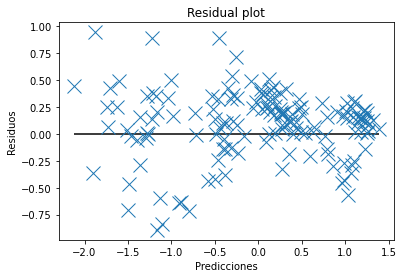


Un 0.01! es bastante :)


In [35]:
df2 = df[['Income composition of resources', 'Adult Mortality']].copy()
df2['GDP'] = np.log(df[['GDP']])
probar_modelo(df2)
print('Un 0.01! es bastante :)')

Bien! Otra cosa que suponemos es que lugares que requieren más años en la escuela necesitan más infraestructura para escuelas públicas (y usamos esa idea para infraestructura pública en general)


Features = ['Income composition of resources', 'Adult Mortality', 'Schooling', 'GDP']
Dado que filtramos NaNs estamos considerando solamente 151 países
X = [('Income composition of resources', 0.13127368783531768), ('Adult Mortality', -0.5310759715431999), ('Schooling', 0.19808796658184272), ('GDP', 0.1284924189788208)]
TSS = 136.30692879196963
RSS = 14.655072516478828
R^2 = 0.8924847574047738
R^2 ajustado = 0.8895391343199731


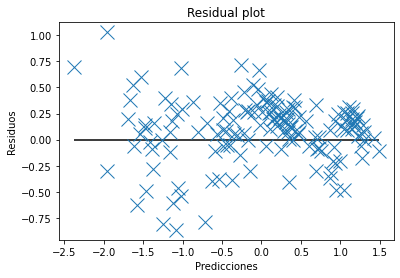


Otro 0.01! es bastante :)


,Income composition of resources,Adult Mortality,Schooling,GDP
Income composition of resources,1.000000,-0.711088,0.864055,0.834806
Adult Mortality,-0.711088,1.000000,-0.694508,-0.710949
Schooling,0.864055,-0.694508,1.000000,0.808116
GDP,0.834806,-0.710949,0.808116,1.000000


In [36]:
df2 = df[['Income composition of resources', 'Adult Mortality', 'Schooling']].copy()
df2['GDP'] = np.log(df[['GDP']])
probar_modelo(df2)
print('Otro 0.01! es bastante :)')

df2.corr()


Features = ['Income composition of resources', 'Adult Mortality', 'Schooling', 'GDP']
Dado que filtramos NaNs estamos considerando solamente 151 países
X = [('Income composition of resources', 0.13127368783531768), ('Adult Mortality', -0.5310759715431999), ('Schooling', 0.19808796658184272), ('GDP', 0.1284924189788208)]
TSS = 136.30692879196963
RSS = 14.655072516478828
R^2 = 0.8924847574047738
R^2 ajustado = 0.8895391343199731


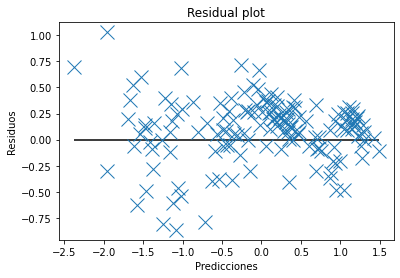


Otro 0.01! es bastante :)


,Income composition of resources,Adult Mortality,Schooling,GDP
Income composition of resources,1.000000,-0.711088,0.864055,0.834806
Adult Mortality,-0.711088,1.000000,-0.694508,-0.710949
Schooling,0.864055,-0.694508,1.000000,0.808116
GDP,0.834806,-0.710949,0.808116,1.000000


In [37]:
df2 = df[['Income composition of resources', 'Adult Mortality', 'Schooling']].copy()
df2['GDP'] = np.log(df[['GDP']])
probar_modelo(df2)
print('Otro 0.01! es bastante :)')

df2.corr()

Estamos contentos con este modelo! El $R^2$ es de $0.892$ ($0.889$ ajustado) y sólo usamos cuatro variables `Income composition of resources`, `Adult Mortality`, `Schooling`.

Antes de pasarlo a confirmarlo queremos ver el Variance Inflation Factor para cada variable.

In [38]:
def vif(M):
    columns = list(M.columns)
    mask = ~M.isna().T.any()
    # Cargamos sólo las cosas dónde tenemos todos los datos
    M = M[mask].copy()
    # Normalizamos todo
    M = normalizar(M)
    for column in columns:
        A = M[[col for col in M.columns if col != column]]
        B = M[column]
        X = least_squares(A, B)
        tss = TSS(B)
        rss = RSS(A, X, B)
        r2 = R2(rss, tss)
        print(f'El VIF para {column} es {1/(1 - r2)}')

vif(df2)

El VIF para Income composition of resources es 5.205189605562638
El VIF para Adult Mortality es 2.311090935467353
El VIF para Schooling es 4.536209713783127
El VIF para GDP es 3.7649960215855223


Decidimos descartar `Income composition` dado que el VIF era muy alto. Volviendo a las suposiciones anteriores probemos con `HIV/AIDS`.


Features = ['HIV/AIDS', 'Adult Mortality', 'Schooling', 'GDP']
Dado que filtramos NaNs estamos considerando solamente 147 países
X = [('HIV/AIDS', -0.17994531847957393), ('Adult Mortality', -0.37375716776658724), ('Schooling', 0.2538543555232556), ('GDP', 0.20609227573087852)]
TSS = 124.32927650075395
RSS = 13.026638033299616
R^2 = 0.8952246936527406
R^2 ajustado = 0.8922732765725361


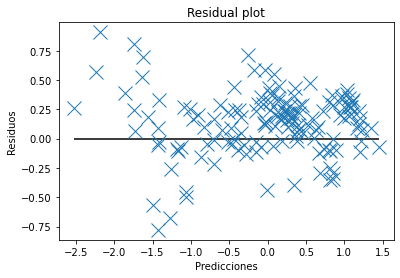


El VIF para HIV/AIDS es 1.7972697168878395
El VIF para Adult Mortality es 3.3224189700031883
El VIF para Schooling es 3.2493957651659287
El VIF para GDP es 3.340050586837451


,HIV/AIDS,Adult Mortality,Schooling,GDP
HIV/AIDS,1.000000,0.655710,-0.464478,-0.415784
Adult Mortality,0.655710,1.000000,-0.694508,-0.710949
Schooling,-0.464478,-0.694508,1.000000,0.808116
GDP,-0.415784,-0.710949,0.808116,1.000000


In [39]:
df3 = df[['HIV/AIDS', 'Adult Mortality', 'Schooling']].copy()
df3['GDP'] = np.log(df[['GDP']])
probar_modelo(df3)
vif(df3)
df3.corr()

Bien! No hay VIF muy altos. Tenemos un par de correlaciones importantes. ¿Son muy colineares las variables?

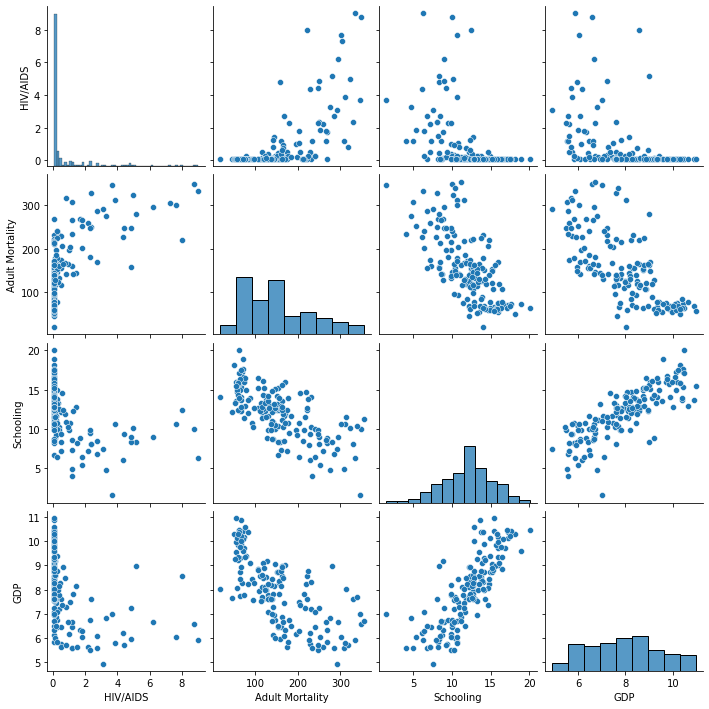

In [40]:
sns.pairplot(data=df3)

Bueno, `GDP` y `Schooling` tienen demasiada colinearidad. Dado que `Schooling` tiene un coeficiente más alto vamos a reemplazar `GDP` por otra de las variables.


Features = ['HIV/AIDS', 'Adult Mortality', 'Schooling', 'Gasto bruto salud']
Dado que filtramos NaNs estamos considerando solamente 133 países
X = [('HIV/AIDS', -0.19407118050192815), ('Adult Mortality', -0.35100553485389463), ('Schooling', 0.22961470636765452), ('Gasto bruto salud', 0.1964353490446286)]
TSS = 101.5812963090176
RSS = 9.638336255412021
R^2 = 0.9051170185297547
R^2 ajustado = 0.9021519253588095


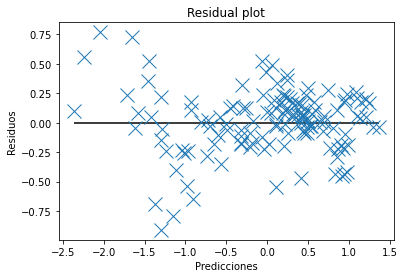


El VIF para HIV/AIDS es 1.78782296361464
El VIF para Adult Mortality es 2.9568927915196337
El VIF para Schooling es 3.003853432986844
El VIF para Gasto bruto salud es 3.097917162650563


,HIV/AIDS,Adult Mortality,Schooling,Gasto bruto salud
HIV/AIDS,1.000000,0.655710,-0.464478,-0.409383
Adult Mortality,0.655710,1.000000,-0.694508,-0.658589
Schooling,-0.464478,-0.694508,1.000000,0.792525
Gasto bruto salud,-0.409383,-0.658589,0.792525,1.000000


<Figure size 432x288 with 0 Axes>

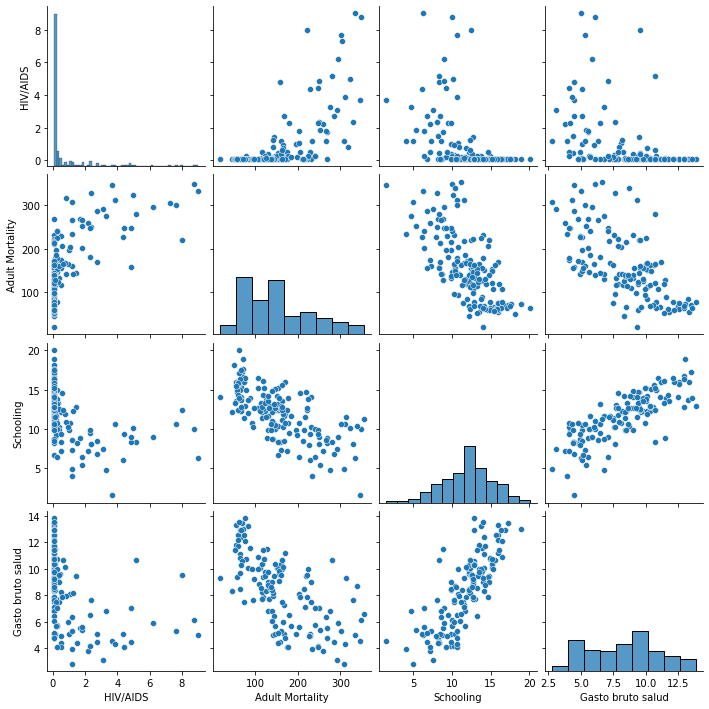

In [41]:
df4 = df[['HIV/AIDS', 'Adult Mortality', 'Schooling', 'Gasto bruto salud']]
probar_modelo(df4).savefig('residualplot-final.pdf')
vif(df4)
sns.pairplot(data=df4).savefig('pairplot-final.pdf')
df4.corr()

Este va a ser nuestro modelo final, con $R^2 = 0.905$ ($0.902$ ajustado).

# Evaluación

Nuestra evaluación va a ser bastante sencilla: Tomamos los datos usables para nuestro modelo, realizamos cuadrados mínimos con una parte de los datos y lo evaluamos contra la otra (buscando medir la capacidad predictiva).

In [42]:
from sklearn.model_selection import train_test_split

def evaluacion():
    VECES = 3000
    lista_r2 = []
    lista_r2_ajustado = []
    lista_r2_prediccion = []
    lista_r2_prediccion_ajustado = []

    A = df[['HIV/AIDS', 'Adult Mortality', 'Schooling', 'Gasto bruto salud']]
    p = len(A.columns)
    mask = ~A.isna().T.any()
    # Cargamos sólo las cosas dónde tenemos todos los datos
    A = A[mask]
    B = B_orig[mask]
    # Normalizamos A
    A = normalizar(A)

    for i in range(VECES):
        print('.', end='', flush=True)
        A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.33, random_state=i)
        X = least_squares(A_train, B_train)

        # Calculo el error de este modelo de regresión
        tss = TSS(B_train)
        rss = RSS(A_train, X, B_train)
        r2 = R2(rss, tss)
        r2_ajustado = R2_ajustado(r2, len(A_train), p)

        # Intento usar el modelo predictivamente y calculo el error
        tss = TSS(B_test)
        rss = RSS(A_test, X, B_test)
        r2_prediccion = R2(rss, tss)
        r2_prediccion_ajustado = R2_ajustado(r2_prediccion, len(A_test), p)

        lista_r2.append(r2)
        lista_r2_ajustado.append(r2_ajustado)
        lista_r2_prediccion.append(r2_prediccion)
        lista_r2_prediccion_ajustado.append(r2_prediccion_ajustado)
    print()

    return pd.DataFrame({
        'R^2': lista_r2,
        'R^2 Ajustado': lista_r2_ajustado,
        'R^2 (pred)': lista_r2_prediccion,
        'R^2 (pred) Ajustado': lista_r2_prediccion_ajustado
    })

df_experimento = evaluacion()

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

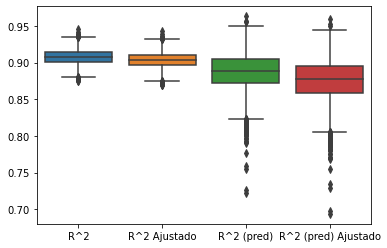

In [43]:
sns.boxplot(data=df_experimento)